# Bike Sharing User Predictions - Explanatory Data Analysis 

In this library the data sets for the bike sharing user prediction analysis are loadad and a preliminiary visual analysis is done prior to the beggining of model creation.

Although the data is originally loaded as a Dask dataframe for later distributed computing while modelling, in this Notebook select columns have been 'computed' as Pandas dataframe in order to generate plots and visualizations.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

import dask.dataframe as dd
from dask.multiprocessing import get

In [2]:
day_dd = dd.read_csv(
    "https://gist.githubusercontent.com/catyselman/722f6bb3526526332d0ae42a4ce493c0/raw/06be55e2678bc969c5b63f0e5478df6f2fcbd234/bikeshare_day.csv",
    blocksize=25e4,
)
data = dd.read_csv(
    "https://gist.githubusercontent.com/catyselman/9353e4e480ddf2db44b44a79e14718b5/raw/ded23e586ca5db1b4a566b1e289acd12ebf69357/bikeshare_hourly.csv",
    blocksize=25e4,
)

In [3]:
data["realtemp"] = data.temp * 41

In [4]:
data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,realtemp
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,9.84
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,9.02
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,9.02
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,9.84
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,9.84
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,9.84
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,9.02
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,8.20
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,9.84
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,13.12


## Difference in Consumption of Bikesharing Services on Working Days and Weekends
This plot below serves to highlight the difference in the nature of bike consumption over the couse of the week. As you can see below, during working days we can clearly see commuting patterns where users take the bikes at peak commuting hours from 7h to 9h and 17h to 19h. On the other hand, when looking at the weekends, the pattern seems to be far more "leasure-ly", people are taking bikes during the day and peaks of usage are in the middle of the day.

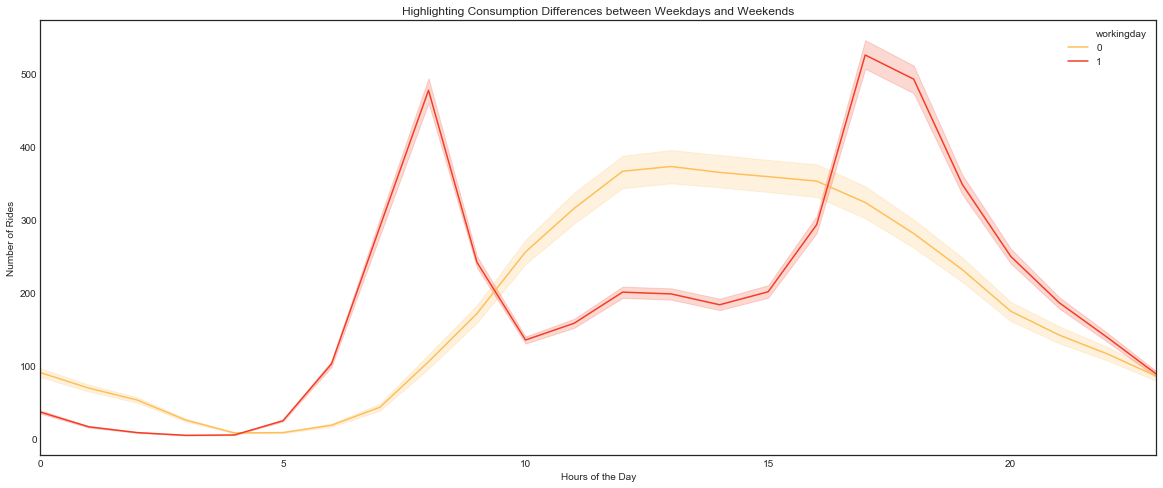

In [5]:
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(
    data=data[["hr", "cnt", "workingday"]].compute(),
    palette="YlOrRd",
    x="hr",
    y="cnt",
    hue="workingday",
    ax=ax,
)
ax.margins(x=0)
ax.set(
    title="Highlighting Consumption Differences between Weekdays and Weekends",
    xlabel="Hours of the Day",
    ylabel="Number of Rides",
)
plt.savefig("pythonproject")

## Showing the seasonality and increasing consumption of Bike Sharing from 2011 to 2012
Here we are showing how much bike sharing usage has increased from 2011 to 2012, while the number of bikes had increased over the period it does not single handedly explain this increase. We attribute this growth to the rise in awareness of alternative mobility services such as bikesharing platforms.

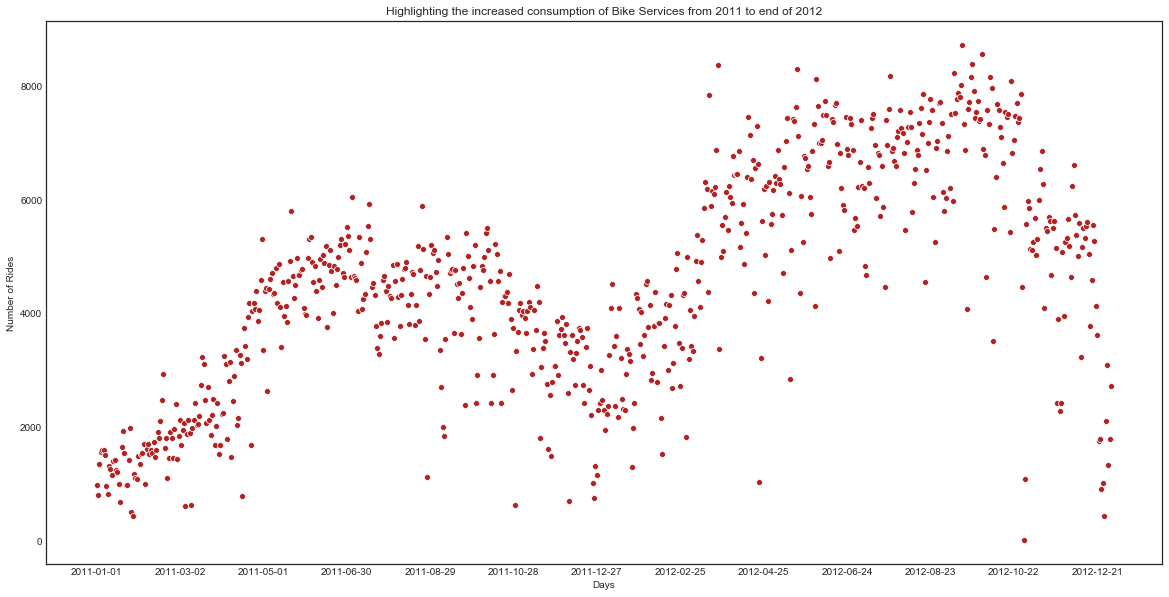

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(
    data=day_dd[["dteday", "cnt", "workingday"]].compute(),
    x="dteday",
    y="cnt",
    color="firebrick",
)
ax.set(
    title="Highlighting the increased consumption of Bike Services from 2011 to end of 2012",
    xlabel="Days",
    ylabel="Number of Rides",
)
ax.xaxis.set_major_locator(ticker.MaxNLocator(15))

plt.show()

## Temperature vs Count plot 
In this specific plot we highlight the pattern in bike usage when plotted against temperature. As expected bike sharing usage increases and peaks in the 25 to 30 degrees Celsius range. It then decreases as the temperatures rise higher.

Text(0, 0.5, 'Count of Rides')

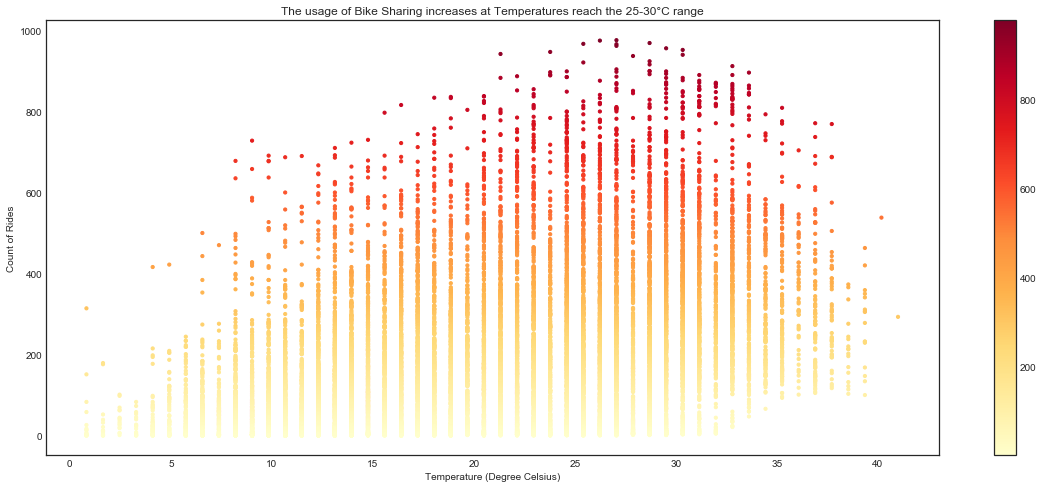

In [7]:
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize=(20, 8))
points = ax.scatter(
    data.realtemp.compute(),
    data.cnt.compute(),
    c=data.cnt.compute(),
    s=10,
    cmap="YlOrRd",
)
fig.colorbar(points)
plt.title("The usage of Bike Sharing increases at Temperatures reach the 25-30°C range")
plt.xlabel("Temperature (Degree Celsius)")
plt.ylabel("Count of Rides")